In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
batch_size = 128

FP 32-bit: 97.626
BFP 4-bit: 90.692
BFP 4-bit (thres: 1.00): 91.176
BFP 4-bit (thres: 0.50): 91.937
BFP 4-bit (thres: 0.10): 94.438


Text(0.5, 1.0, 'ResNet50 on CIFAR10')

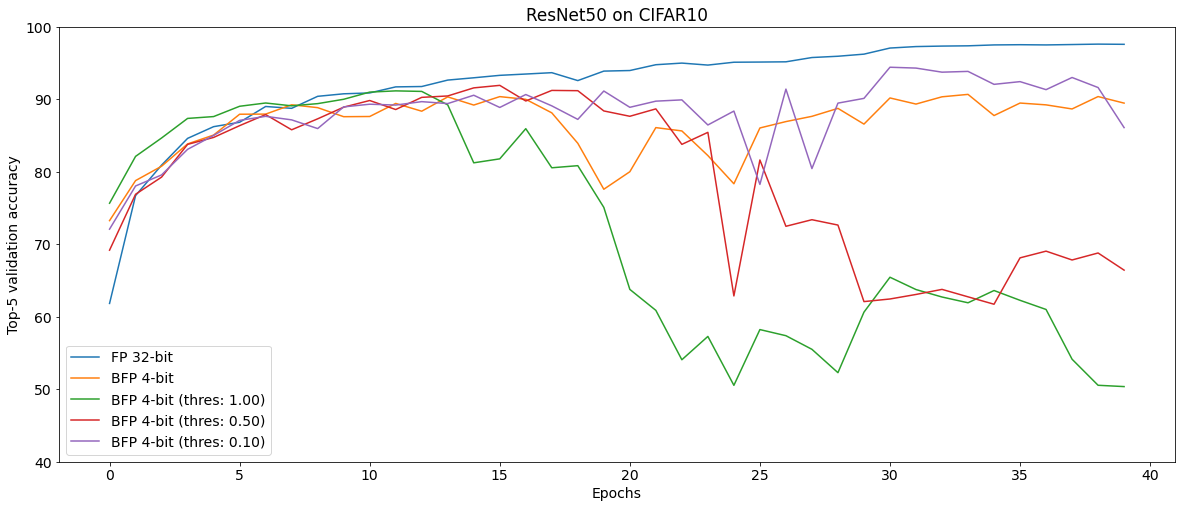

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# resnet50-fp32-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
# resnet50-bfp-m4-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234


# paths = [
#     "resnet50-fp32-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
#     "resnet50-bfp-m4-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone",
#     "resnet50-bfp-m6-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone",
#     "resnet50-bfp-m8-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone"
# ]
# labels = [
#     "FP 32-bit",
#     "BFP 4-bit",
#     "BFP 6-bit",
#     "BFP 8-bit"
# ]

# seeds = [1024, 2048, 3072, 4096]
seeds = [1024, 2048, 4096]
# seeds = [2048]

paths = [
    "no_st-no_thres-resnet50-fp32-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # "no_st-no_thres-resnet50-fp32-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # "no_st-no_thres-resnet152-fp32-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-no_thres-resnet152-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # "abs-no_st-no_thres-resnet50-fp32-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "abs-st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # f"test-small-model-sr-wa-sample-nn-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # f"test-small-model-sr-wa-replace-outlier-F-1000-sample-nn-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # f"test-small-model-sr-wa-replace-outlier-F-100-sample-nn-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # f"test-small-model-sr-wa-replace-outlier-F-10-sample-nn-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # f"test-small-model-sr-wa-replace-outlier-F-1-sample-nn-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    
    # "st_fwa-thres_fwa1000-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa100-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa10-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa1-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # "st_fwa-thres_fwa1000-resnet152-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa100-resnet152-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa10-resnet152-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-thres_fwa1-resnet152-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    "multi_exp-st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.01-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # "abs-st_fwa-thres_fwa1.00-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "abs-st_fwa-thres_fwa0.50-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "abs-st_fwa-thres_fwa0.10-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",

    # f"sr-wa-replace-outlier-WA-1000-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar100-global_batch128-single_gpu-",
    # f"sr-wa-replace-outlier-WA-100-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar100-global_batch128-single_gpu-",
    # f"sr-wa-replace-outlier-WA-10-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar100-global_batch128-single_gpu-",
    # f"sr-wa-replace-outlier-WA-1-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar100-global_batch128-single_gpu-",

    # "3d-linear-st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-",
    # "st_fwa-no_thres-resnet50-bfp-m4-sgd-lr0.1-wd0.0001-m0.9-cifar10-global_batch128-single_gpu-"
]

labels = [
    "FP 32-bit",
    # "BFP 4-bit",
    # "BFP 6-bit",
    # "BFP 8-bit",

    # "BFP 4-bit (W)",
    "BFP 4-bit",
    "BFP 4-bit (multi-exp)",

    # "BFP 4-bit (thres: 1000%)",
    # "BFP 4-bit (thres: 100%)",
    # "BFP 4-bit (thres: 10%)",
    # "BFP 4-bit (thres: 1%)",

    # "BFP 4-bit (thres: 1.00)",
    # "BFP 4-bit (thres: 0.50)",
    # "BFP 4-bit (thres: 0.10)",
    # "3d linear",
    # "baseline"
]

epochs = 20
plt.figure(figsize=(20,8))
plt.ylim((40, 100))

for i in range(len(paths)):
    path = paths[i]
    valid_top5 = []
    for seed in seeds:
        top5 = []
        for epoch in range(epochs):
            data = torch.load(f"../train-log/{path}seed{seed}-step30-epochs40/epoch-{epoch}-info.pth")
            # data = torch.load(f"/mnt/hdd/yskim/train-log/{path}seed{seed}/epoch-{epoch}-info.pth")
            # data = torch.load(f"/mnt/hdd/yskim/train-log/resnet50-cifar10-lr0.1/{path}seed{seed}-step30-epochs40/epoch-{epoch}-info.pth")
            # data = torch.load(f"/mnt/hdd/yskim/train-log/resnet152-cifar10-lr0.01/{path}seed{seed}-step30-epochs40/epoch-{epoch}-info.pth")
            # data = torch.load(f"/mnt/hdd/yskim/train-log/resnet50-cifar10-lr0.01/{path}seed{seed}-step30-epochs40/epoch-{epoch}-info.pth")

            top5.append(data["valid_top5"].item())
        valid_top5.append(top5)
    valid_top5 = np.mean(np.array(valid_top5), axis=0)
    # print(valid_top5.shape)
    
    # break
    plt.plot(np.arange(len(valid_top5)), valid_top5, label=labels[i])
    print(f"{labels[i]}: {np.max(valid_top5):.3f}")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Top-5 validation accuracy")
plt.title("ResNet50 on CIFAR10")


In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# resnet50-fp32-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
# resnet50-bfp-m4-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234


# paths = [
#     "resnet50-fp32-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
#     "resnet50-bfp-m4-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone",
#     "resnet50-bfp-m6-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone",
#     "resnet50-bfp-m8-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234-sortNone"
# ]
# labels = [
#     "FP 32-bit",
#     "BFP 4-bit",
#     "BFP 6-bit",
#     "BFP 8-bit"
# ]

# paths = [
#     "resnet50-fp32-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
#     "sr-w-resnet50-bfp-m4-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
#     "sr-w-resnet50-bfp-m6-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
#     "sr-w-resnet50-bfp-m8-adam-lr0.001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234"
# ]

# labels = [
#     "FP 32-bit",
#     "BFP 4-bit W",
#     "BFP 6-bit W",
#     "BFP 8-bit W"
# ]

paths = [
    "resnet152-fp32-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-resnet152-bfp-m4-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-resnet152-bfp-m6-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-resnet152-bfp-m8-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-replace-outlier-F-30-resnet152-bfp-m4-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-replace-outlier-A-30-resnet152-bfp-m4-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234",
    "sr-w-replace-outlier-W-30-resnet152-bfp-m4-adam-lr0.0001-wd0.0001-cifar100-global_batch128-single_gpu-seed1234"
]

labels = [
    "FP 32-bit",
    "BFP 4-bit",
    "BFP 6-bit",
    "BFP 8-bit",
    "*BFP 4-bit F",
    "*BFP 4-bit A",
    "*BFP 4-bit W",
]

epochs = 40
plt.figure(figsize=(5,8))
plt.ylim((50, 65))

for i in range(len(paths)):
    path = paths[i]
    valid_top5 = []
    for epoch in range(epochs):
        # data = torch.load(f"../train-log/{path}/epoch-{epoch}-info.pth")
        valid_top5.append(data["valid_top5"].item())
    plt.plot(np.arange(len(valid_top5)), valid_top5, label=labels[i])
    print(f"{labels[i]}: {np.max(valid_top5):.3f}")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Top-5 validation accuracy")
plt.title("ResNet152 on CIFAR100")


In [ ]:
# resnet50-fp32-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
# resnet50-bfp-m4-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
formats = ["fp32", "bfp-m4"]
lrs = ["1e-05"]
# lrs = ["0.1", "0.01", "0.001"]
epochs = 120

for lr in lrs:
    suffix = "wd0.0001-cifar100-global_batch128-single_gpu-seed1234"
    fp_path = f"{model}-{formats[0]}-adam-lr{lr}-wd0.0001-cifar100-global_batch{batch_size}-single_gpu-seed1234"
    bfp_path = f"{model}-{formats[1]}-adam-lr{lr}-wd0.0001-cifar100-global_batch{batch_size}-single_gpu-seed1234"
    
    fp_valid_top5 = []
    for epoch in range(epochs):
        data = torch.load(f"../train-log/{fp_path}/epoch-{epoch}-info.pth")
        fp_valid_top5.append(data["valid_top5"].item())
        # print(data["valid_top5"].item())
        
    bfp_valid_top5 = []
    for epoch in range(epochs):
        data = torch.load(f"../train-log/{bfp_path}/epoch-{epoch}-info.pth")
        bfp_valid_top5.append(data["valid_top5"].item())
        
    plt.ylim((0, 100))
    plt.plot(np.arange(len(fp_valid_top5)), fp_valid_top5, label="FP")
    plt.plot(np.arange(len(fp_valid_top5)), bfp_valid_top5, label="BFP")
    plt.legend()
    print(f"max  fp: {np.max(fp_valid_top5)}:.2f")
    print(f"max bfp: {np.max(bfp_valid_top5)}:.2f")


In [ ]:
# resnet50-fp32-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
# resnet50-bfp-m4-adam-lr0.1-wd0.0001-cifar100-global_batch128-single_gpu-seed1234
formats = ["fp32", "bfp-m4"]
lrs = ["0.001"]
# lrs = ["0.1", "0.01", "0.001"]
epochs = 120

for lr in lrs:
    suffix = "wd0.0001-cifar100-global_batch128-single_gpu-seed1234"
    fp_path = f"{model}-{formats[0]}-adam-lr{lr}-wd0.0001-cifar100-global_batch{batch_size}-single_gpu-seed1234"
    bfp_path = f"{model}-{formats[1]}-adam-lr{lr}-wd0.0001-cifar100-global_batch{batch_size}-single_gpu-seed1234"
    
    fp_valid_top5 = []
    for epoch in range(epochs):
        data = torch.load(f"../train-log/{fp_path}/epoch-{epoch}-info.pth")
        fp_valid_top5.append(data["valid_top5"].item())
        # print(data["valid_top5"].item())
        
    bfp_valid_top5 = []
    for epoch in range(epochs):
        data = torch.load(f"../train-log/{bfp_path}/epoch-{epoch}-info.pth")
        bfp_valid_top5.append(data["valid_top5"].item())
        
    plt.ylim((0, 100))
    plt.plot(np.arange(len(fp_valid_top5)), fp_valid_top5, label="FP")
    plt.plot(np.arange(len(fp_valid_top5)), bfp_valid_top5, label="BFP")
    plt.legend()